<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Install

In [1]:
! pip install min-dalle
! nvidia-smi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for min-dalle: filename=min_dalle-0.2.24-py3-none-any.whl size=11198 sha256=d7c26dc9230a9b6b0e1e6d8026ec24192c248b4f3bcd61ad6fc3253449f45959
  Stored in directory: /root/.cache/pip/wheels/25/95/af/94274bdc5e07b7aab46294f2bf36768aab35e4ed41371460c4
Successfully built min-dalle
Tue Jul  5 00:48:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P10

### Load Model

In [2]:
from PIL import Image
from IPython.display import update_display
import numpy
from math import log2
from min_dalle import MinDalle

model = MinDalle(is_mega=True, is_reusable=True)

initializing MinDalle
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


### Generate Images
Note: reduce the grid size if you run out of GPU memory.  4x4 has been tested to work on T4 and P100 (with intermediate_image_count = 1)

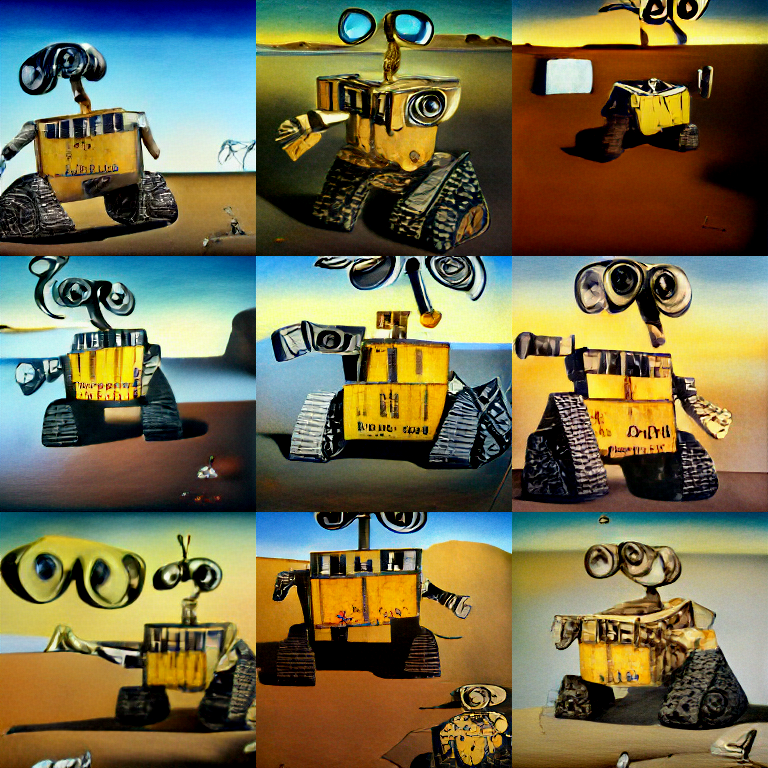

CPU times: user 34.2 s, sys: 524 ms, total: 34.8 s
Wall time: 34.7 s


In [4]:
%%time

text = "Dali painting of WALL·E" #@param {type:"string"}
grid_size = 3 #@param {type:"integer"}
seed = -1 #@param {type:"integer"}
intermediate_image_count = 8 #@param ["1", "2", "4", "8", "16"] {type:"raw"}

image_stream = model.generate_image_stream(
    text,
    seed,
    grid_size,
    log2(intermediate_image_count)
)

image_shape = [256 * grid_size] * 2 + [3]
zero_image = numpy.zeros(image_shape, dtype=numpy.uint8)
display(Image.fromarray(zero_image), display_id=1)

for image in image_stream:
    update_display(image, display_id=1)